## Lesson 7~8. Homerun Data, 
### - ggplot (point, line)
### - Data type (numerical, categorical, time series)

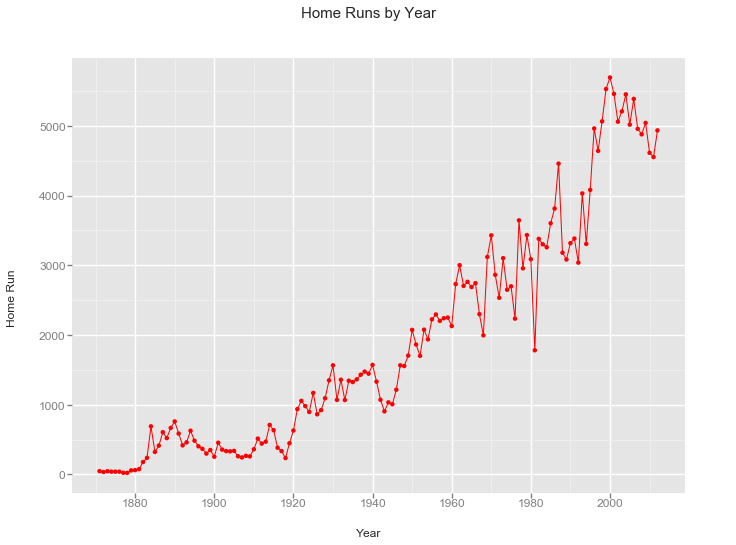

<ggplot: (-9223371928062882949)>


In [32]:
import pandas as pd
from ggplot import *

def lineplot(hr_year_csv):
    gg = (ggplot(hr_year_csv, aes('yearID', 'HR')) + 
          geom_point(color = 'red') + 
          geom_line(color = 'red') + 
          ggtitle(element_text(text = "Home Runs by Year", size = 15)) + 
          xlab("Year") + ylab("Home Run"))
    
    return gg
        
df = pd.read_csv('./Data/hr_year.csv')
print(lineplot(df))

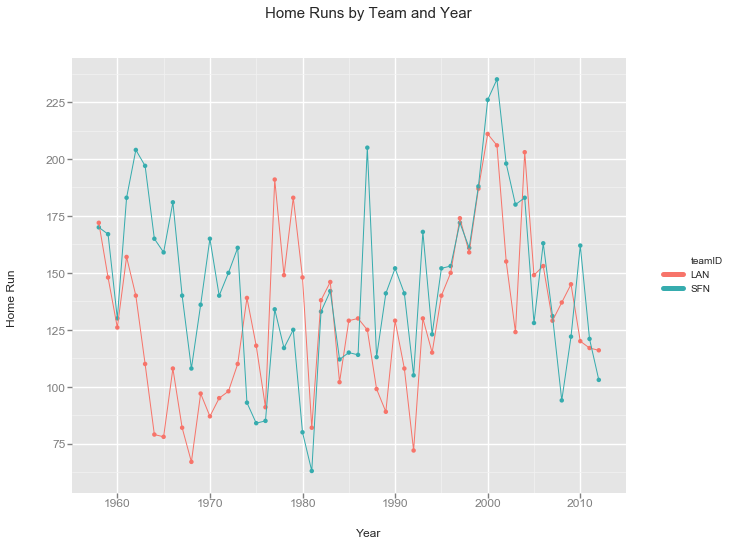

<ggplot: (-9223371928062708743)>


In [33]:
def lineplot_compare(hr_by_team_year_csv):
    gg = (ggplot(hr_by_team_year_csv, aes('yearID', 'HR', color = 'teamID')) +
          geom_point() + geom_line() +
          ggtitle(element_text(text = "Home Runs by Team and Year", size = 15)) +
          xlab("Year") + ylab("Home Run"))
    
    return gg
    
df = pd.read_csv('./Data/hr_by_team_year_sf_la.csv')
print(lineplot_compare(df))

### - Problem Set. NYC Subway Weather 3

In [34]:
# quiz - plot the data freely using matplotlib & seaborn

import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style("darkgrid")

master_df = pd.read_csv('./Data/turnstile_data_master_with_weather.csv')
master_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

master_df['DATEn'] = pd.to_datetime(master_df['DATEn'])
master_df['day'] = master_df['DATEn'].apply(lambda d : d.day)

day_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
master_df['day_of_week'] = master_df['DATEn'].dt.weekday_name
master_df['day_of_week'] = master_df['day_of_week'].map(dict(zip(day_list, np.arange(1, 8))))

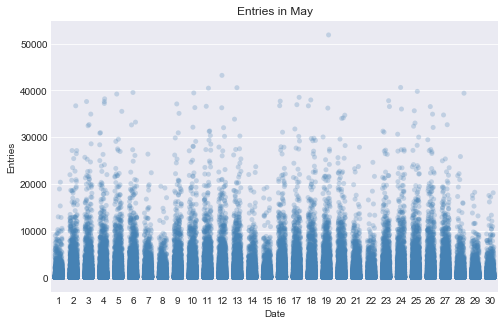

In [35]:
# ridership in May (point)

fig, ax = plt.subplots(figsize = (8, 5))

ax = sns.stripplot(x = "day", y = "ENTRIESn_hourly", data = master_df, 
                              color = "steelblue", jitter = 0.25, alpha = 0.25)

ax.set(xlabel = "Date", ylabel = "Entries", title = "Entries in May")

plt.show()

C:\Users\qshick\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


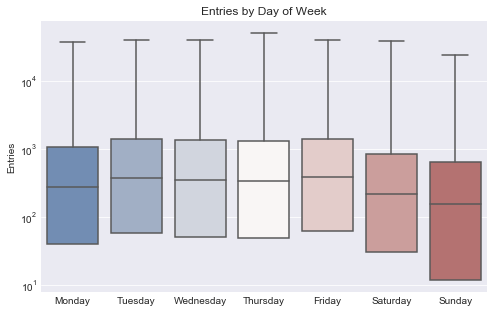

In [36]:
# ridership by day of week (histogram)

fig, ax = plt.subplots(figsize = (8, 5))
ax.set_yscale("log")

ax = sns.boxplot(x = "day_of_week", y = "ENTRIESn_hourly", data = master_df,
                         whis = np.inf, palette = "vlag")

ax.set(xlabel = "", ylabel = "Entries", title = "Entries by Day of Week")

ax.set_xticklabels(day_list)

plt.show()

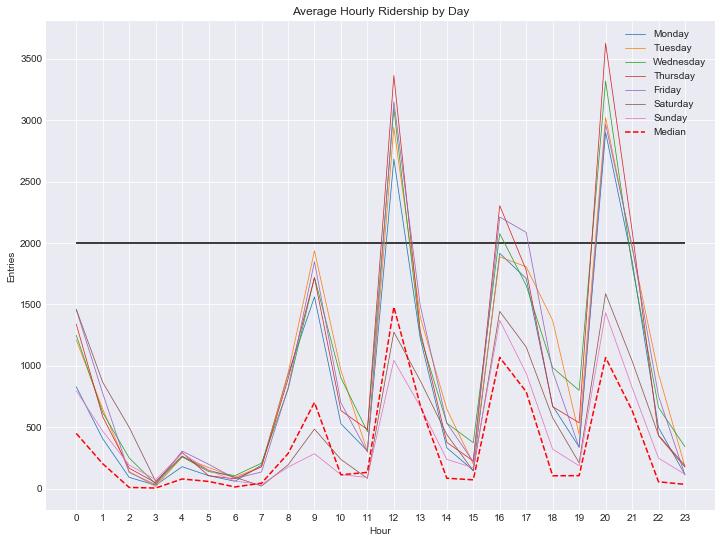

In [37]:
# hourly ridership by day of week(point line)

hourly_mean_by_day = master_df.groupby(['Hour', 'day_of_week'])['ENTRIESn_hourly'].mean()
hourly_mean_by_day_df = pd.DataFrame(hourly_mean_by_day).unstack(1)
hourly_mean_by_day_df = hourly_mean_by_day_df['ENTRIESn_hourly'].reset_index()

hourly_median_by_day = master_df.groupby(['Hour'])['ENTRIESn_hourly'].median()
hourly_median_by_day_df = pd.DataFrame(hourly_median_by_day)
hourly_median_by_day_df = hourly_median_by_day_df.reset_index()

fig, ax = plt.subplots(figsize = (12, 9))
h_mean = hourly_mean_by_day_df['Hour']

for i in range(1, 8):
    entry_mean = hourly_mean_by_day_df[i]
    ax.plot(h_mean, entry_mean, lw = 0.75, label = day_list[i-1])

h_median = hourly_median_by_day_df['Hour']
entry_median = hourly_median_by_day_df['ENTRIESn_hourly']
ax.plot(h_median, entry_median, 'r--', label = "Median")

ax.hlines(y = 2000, xmin = 0, xmax = 23)
ax.set(xlabel = "Hour", ylabel = "Entries", title = "Average Hourly Ridership by Day")
ax.set_xticks(np.arange(24))
ax.legend()

plt.show()

C:\Users\qshick\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


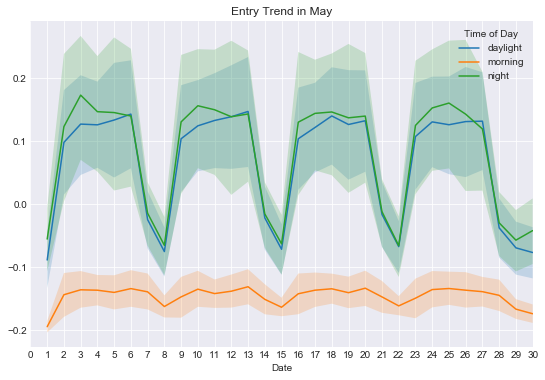

In [38]:
# ridership in May by Hour (Time Series)

def normalize(data):
    mean_ = data.mean()
    min_ = data.min()
    max_ = data.max()
    norm = (data - mean_) / (max_ - min_)
    
    return pd.Series(norm)

def time_of_day(hour):
    if hour > 0 and hour < 9:
        return "morning"
    elif hour < 17:
        return "daylight"
    else:
        return "night"

date_hour = master_df.groupby(['DATEn', 'Hour'])['ENTRIESn_hourly'].mean()
date_hour_df = pd.DataFrame(date_hour)
date_hour_df = date_hour_df['ENTRIESn_hourly'].reset_index()
date_hour_df['DATEn'] = (date_hour_df['DATEn'].apply(lambda d : d.day)).astype('float')
date_hour_df['ENTRIESn_hourly'] = normalize(date_hour_df['ENTRIESn_hourly'])
date_hour_df['time_of_day'] = date_hour_df['Hour'].apply(lambda t : time_of_day(t))

fig, ax = plt.subplots(figsize = (9, 6))
ax = sns.tsplot(time = "DATEn", value = "ENTRIESn_hourly", data = date_hour_df,
                unit = "Hour", condition = "time_of_day")

ax.set(xlabel = "Date", ylabel = "", title = "Entry Trend in May")
ax.set_xticks(np.arange(31))
ax.legend(title = "Time of Day")

plt.show()